In [1]:
library(Matrix)
library(ggplot2)
library(RColorBrewer)

In [2]:
load("Visium_CN.RData")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Saving 6.67 x 6.67 in image


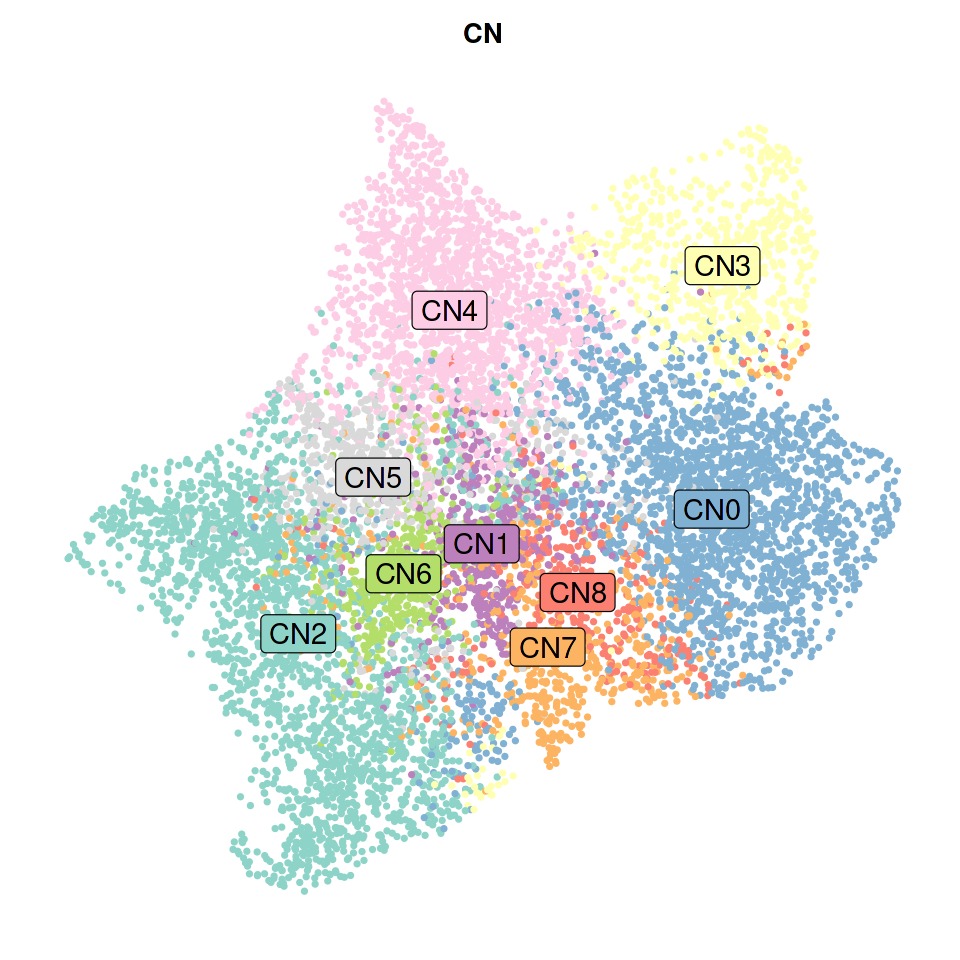

In [26]:
options(repr.plot.width = 8, repr.plot.height = 8)

cn <- c('CN0', 'CN1', 'CN2', 'CN3', 'CN4', 'CN5', 'CN6', 'CN7', 'CN8')
cn_colors <- c('#80b1d3', '#bc80bd', '#8dd3c7', '#ffffb3', '#fccde5', '#d9d9d9','#b3de69', '#fdb462', '#fb8072')

p <- DimPlot_scCustom(seurat_object = visium,  group.by = "CN", pt.size = 1, label.size = 6, label.box = TRUE, label = TRUE) +
    scale_color_manual(breaks = cn, values=cn_colors) + 
    scale_fill_manual(values = cn_colors, breaks = cn) + NoLegend() + NoAxes() + coord_fixed(ratio = 1) 
p

In [7]:
matrisome_set = read.table("ecm_genes_mouse.txt", sep = "\t", header = TRUE)
collagens = matrisome_set$Gene.Symbol[which(matrisome_set$Category %in% c("Collagens"))]

In [8]:
collagens_genes <- intersect(collagens,rownames(visium))
print(length(collagens_genes))

[1] 44


In [9]:
visium <- AddModuleScore(
  object = visium,
  nbin = 100,
  ctrl = 10,
  features = list(collagens_genes),
  name = 'Collagen.Score'
)

In [10]:
glycoproteins = matrisome_set$Gene.Symbol[which(matrisome_set$Category %in% c("ECM Glycoproteins"))]
glycoproteins_genes <- intersect(glycoproteins,rownames(visium))
print(length(glycoproteins_genes))

[1] 185


In [15]:
visium <- AddModuleScore(
  object = visium,
  nbin = 100,
  ctrl = 10,
  features = list(glycoproteins_genes),
  name = 'Glycoproteins.Score'
)

In [25]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 300)
p1 <- Plot_Density_Custom(visium, features = 'Collagen.Score1', pt.size = 1.5)+
            scale_colour_gradientn(colours = rev(brewer.pal(n = 10, name = "RdBu"))) + NoAxes() + coord_fixed(ratio = 1) 
p2 <- Plot_Density_Custom(visium, features = 'Glycoproteins.Score1', pt.size = 1.5)+
            scale_colour_gradientn(colours = rev(brewer.pal(n = 10, name = "RdBu"))) + NoAxes() + coord_fixed(ratio = 1) 
ggsave("ECM_density1.png", plot = p1+p2)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Saving 6.67 x 6.67 in image


In [23]:
Proteoglycans = matrisome_set$Gene.Symbol[which(matrisome_set$Category %in% c("Proteoglycans"))]

proteoglycanss_genes <- intersect(Proteoglycans,rownames(visium))
print(length(proteoglycanss_genes))

visium <- AddModuleScore(
  object = visium,
  nbin = 10,
  ctrl = 10,
  features = list(proteoglycanss_genes),
  name = 'Proteoglycans.Score'
)

[1] 36


In [19]:
ECM_genes = matrisome_set$Gene.Symbol[which(matrisome_set$Division %in% c("Core matrisome"))]
ECM_genes <- intersect(ECM_genes,rownames(visium))
print(length(ECM_genes))

[1] 265


In [20]:
visium <- AddModuleScore(
  object = visium,
  nbin = 10,
  ctrl = 10,
  features = list(ECM_genes),
  name = 'ECM.Score'
)

In [26]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 300)
p1 <- Plot_Density_Custom(visium, features = 'Proteoglycans.Score1', pt.size = 1.5)+
            scale_colour_gradientn(colours = rev(brewer.pal(n = 10, name = "RdBu"))) + NoAxes() + coord_fixed(ratio = 1) 
p2 <- Plot_Density_Custom(visium, features = 'ECM.Score1', pt.size = 1.5)+
            scale_colour_gradientn(colours = rev(brewer.pal(n = 10, name = "RdBu"))) + NoAxes() + coord_fixed(ratio = 1) 
ggsave("ECM_density2.png", plot = p1+p2)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Saving 6.67 x 6.67 in image


In [28]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 300)
p1 <- Plot_Density_Custom(visium, features = 'Collagen.Score1', pt.size = 1.5)+
            scale_colour_gradientn(colours = rev(brewer.pal(n = 10, name = "RdBu"))) + NoAxes() + coord_fixed(ratio = 1) 
p2 <- Plot_Density_Custom(visium, features = 'ECM.Score1', pt.size = 1.5)+
            scale_colour_gradientn(colours = rev(brewer.pal(n = 10, name = "RdBu"))) + NoAxes() + coord_fixed(ratio = 1) 
ggsave("ECM_density3.png", plot = p1+p2)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Saving 6.67 x 6.67 in image


In [29]:
load("IRIall.RData")
sc.all <- UpdateSeuratObject(IRI.all)

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc ‘pca’

Updating matrix keys for DimReduc ‘umap’

Updating matrix keys for DimReduc ‘harmony’

Warning message:
“Assay RNA changing from Assay to Assay”
Warning message:
“Graph RNA_nn changing from Graph to Graph”
Warning message:
“Graph RNA_snn changing from Graph to Graph”
Warning message:
“DimReduc pca changing from DimReduc to DimReduc”
Warning message:
“DimReduc umap changing from DimReduc to DimReduc”
Warning message:
“DimReduc harmony changing from DimReduc to DimReduc”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in RNA_nn

Setting default assay of RNA_nn to RNA

Updating slots in RNA_snn

Setting default assay of RNA_snn to RNA

Updating slots in pca

Updating slots in umap

Setting umap DimReduc to global

Updating slots in harmony

Setting assay used for Norm

In [34]:
sc.all <- SetIdent(sc.all, value = "name")

In [45]:
injury_markers <- FindMarkers(sc.all, ident.1 = "NewPT1", only.pos = TRUE,  logfc.threshold = 1)
injury_markers <- injury_markers[injury_markers$pct.1>0.1,]
injury_markers <- rownames(injury_markers)
injury_markers <- intersect(injury_markers,rownames(visium))

In [54]:
visium <- AddModuleScore(
  object = visium,
  nbin = 150,
  ctrl = 10,
  features = list(injury_markers),
  name = 'Injury.Score'
)

In [81]:
cell_cycle_genes <- read.csv("../cell_cycle_markers.csv")

In [89]:
s_genes <- cell_cycle_genes %>%
        dplyr::filter(phase == "S")  %>%
  dplyr::pull(gene_name)

g2m_genes <- cell_cycle_genes %>%
        dplyr::filter(phase == "G2/M")  %>%
  dplyr::pull(gene_name)

visium <- CellCycleScoring(visium, s.features = s_genes, g2m.features = g2m_genes, nbin = 10, ctrl = 12)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Saving 6.67 x 6.67 in image


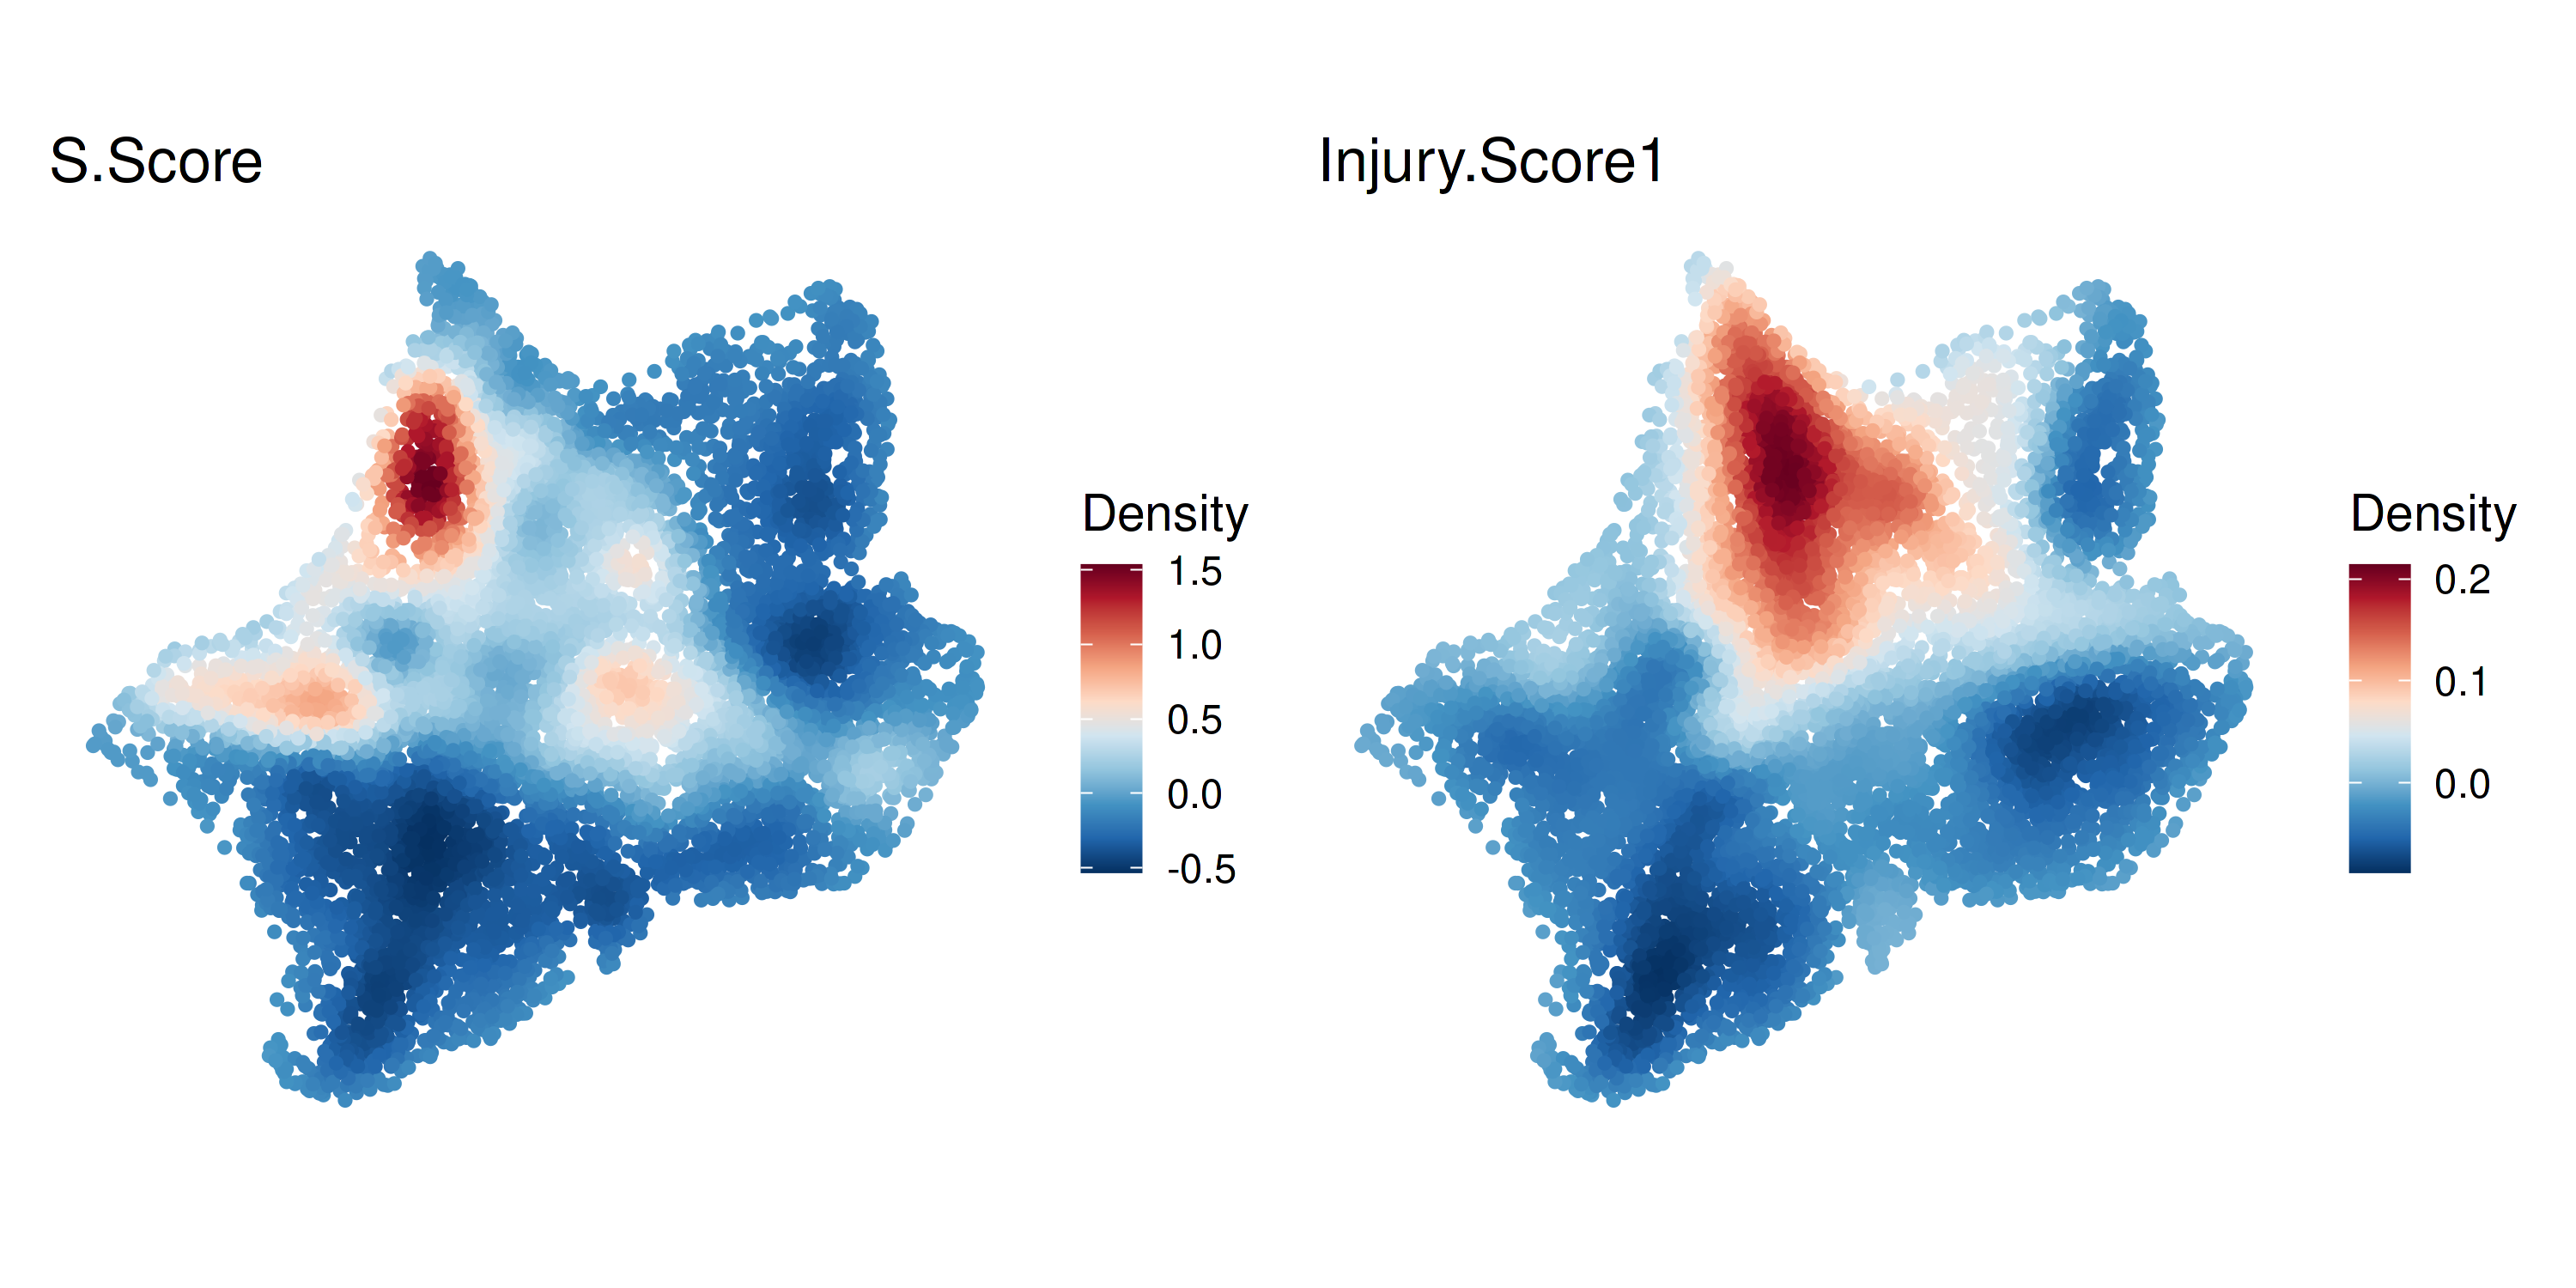

In [117]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 300)
p1 <- Plot_Density_Custom(visium, features = 'S.Score', pt.size = 1.5)+
            scale_colour_gradientn(colours = rev(brewer.pal(n = 10, name = "RdBu"))) + NoAxes() + coord_fixed(ratio = 1) 
p2 <- Plot_Density_Custom(visium, features = 'Injury.Score1', pt.size = 1.5)+
            scale_colour_gradientn(colours = rev(brewer.pal(n = 10, name = "RdBu"))) + NoAxes() + coord_fixed(ratio = 1) 
p1|p2

In [159]:
rev(levels(visium@meta.data$ident))

[1] "ShamR"   "Hour4R"  "Hour12R" "Day2R"   "Day14R"  "Week6R"

In [160]:
visium@meta.data$time <- str_remove(visium@meta.data$ident, "R")

In [161]:
visium@meta.data$time <- factor(visium@meta.data$time, levels = c('Sham','Hour4','Hour12','Day2','Day14','Week6'))

In [162]:
visium <- SetIdent(visium, value = "time")

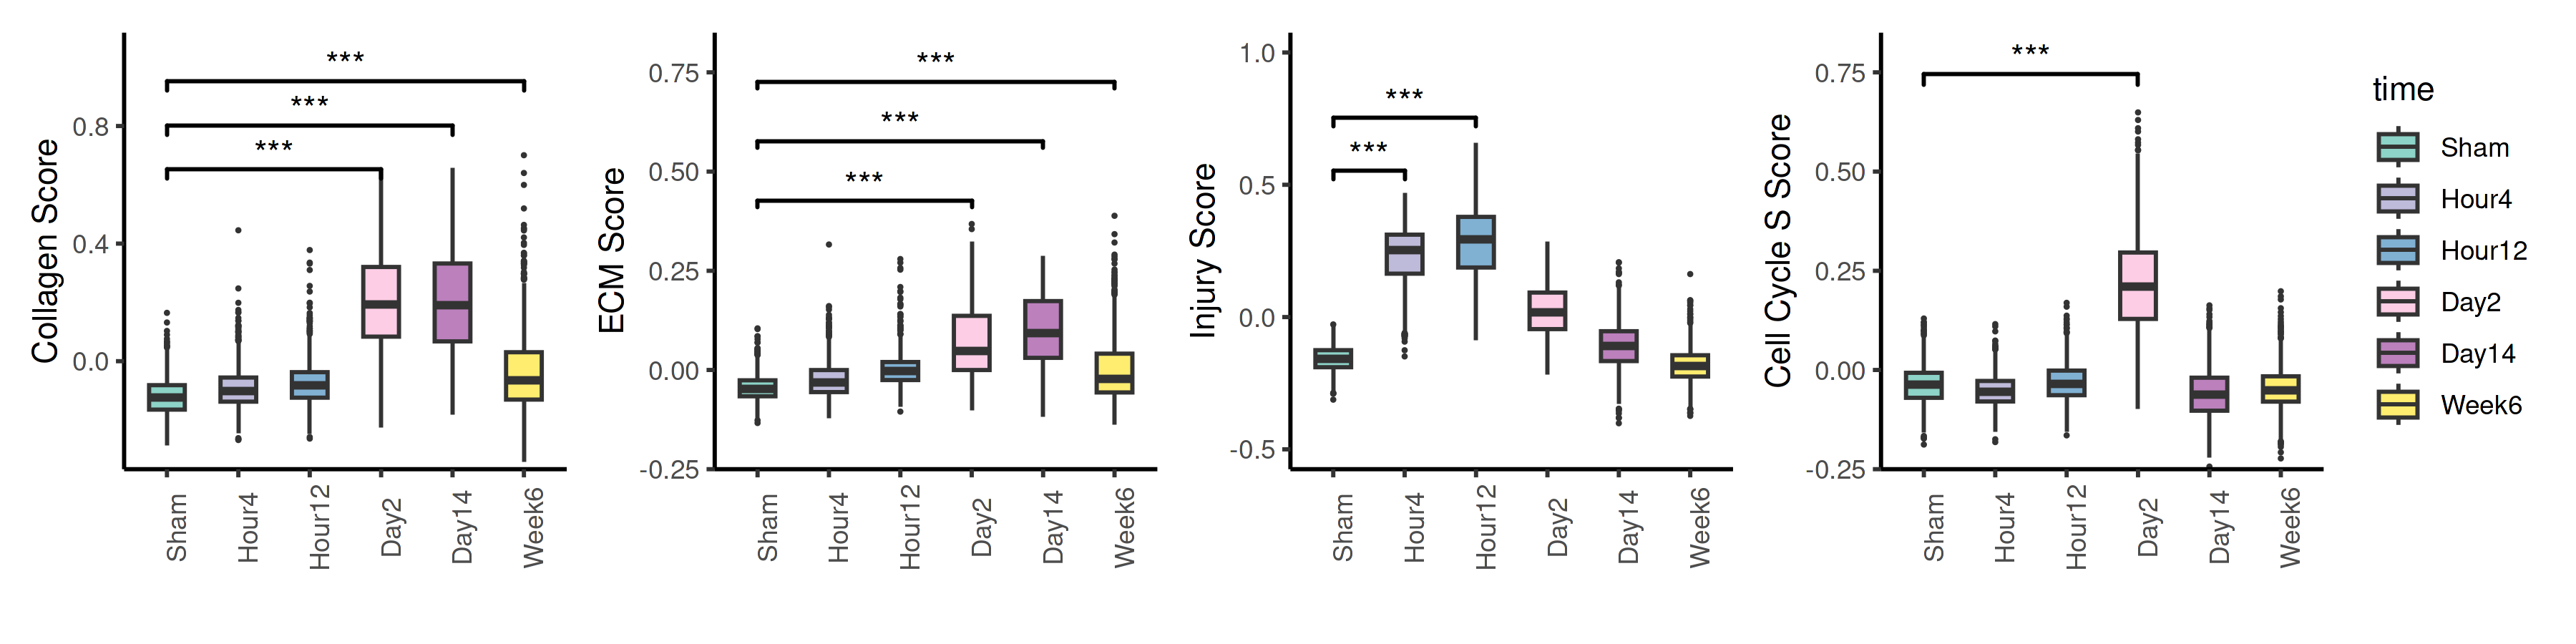

In [241]:
library(ggsignif)
options(repr.plot.width = 12, repr.plot.height = 3, repr.plot.res = 300)

p1 <- ggplot(data = visium@meta.data, aes(x = time, y = Collagen.Score1, fill = time)) +
  geom_boxplot(outlier.size = 0.1, width=0.5) + 
  scale_fill_manual(values = c('#8dd3c7', '#bebada', '#80b1d3', '#fccde5', '#bc80bd', '#ffed6f')) + 
    geom_signif(comparisons = list(c("Day14", "Sham"), c("Day2", "Sham"), c("Week6", "Sham")), 
              map_signif_level = TRUE, 
              test = "wilcox.test", 
              textsize = 4, 
              y_position = c(0.75, 0.6, 0.9))+
  coord_cartesian(ylim = c(-0.3, 1.05))  + 
  labs(x = "", y = "Collagen Score") +
    theme_classic() +
  theme(axis.text.x = element_text(angle = 90, hjust = 0.5))+
  guides(fill = "none")

p2 <- ggplot(data = visium@meta.data, aes(x = time, y = ECM.Score1, fill = time)) +
  geom_boxplot(outlier.size = 0.1, width=0.5) + 
 scale_fill_manual(values = c('#8dd3c7', '#bebada', '#80b1d3', '#fccde5', '#bc80bd', '#ffed6f')) + 
    geom_signif(comparisons = list(c("Day14", "Sham"), c("Day2", "Sham"), c("Week6", "Sham")), 
              map_signif_level = TRUE, 
              test = "wilcox.test", 
              textsize = 4, 
              y_position = c(0.55, 0.4, 0.7))+
  coord_cartesian(ylim = c(-0.2, 0.8))  + 
  labs(x = "", y = "ECM Score") +
    theme_classic() +
  theme(axis.text.x = element_text(angle = 90, hjust = 0.5)) +
  guides(fill = "none")

p3 <- ggplot(data = visium@meta.data, aes(x = time, y = Injury.Score1, fill = time)) +
  geom_boxplot(outlier.size = 0.1, width=0.5) + 
 scale_fill_manual(values = c('#8dd3c7', '#bebada', '#80b1d3', '#fccde5', '#bc80bd', '#ffed6f')) + 
    geom_signif(comparisons = list(c("Hour4", "Sham"), c("Hour12", "Sham")), 
              map_signif_level = TRUE, 
              test = "wilcox.test", 
              textsize = 4, 
              y_position = c(0.5, 0.7))+
  coord_cartesian(ylim = c(-0.5, 1))  + 
  labs(x = "", y = "Injury Score") +
    theme_classic() +
  theme(axis.text.x = element_text(angle = 90, hjust = 0.5))+
  guides(fill = "none")

p4 <- ggplot(data = visium@meta.data, aes(x = time, y = S.Score, fill = time)) +
  geom_boxplot(outlier.size = 0.1, width=0.5) + 
 scale_fill_manual(values = c('#8dd3c7', '#bebada', '#80b1d3', '#fccde5', '#bc80bd', '#ffed6f')) + 
    geom_signif(comparisons = list(c("Day2", "Sham")), 
              map_signif_level = TRUE, 
              test = "wilcox.test", 
              textsize = 4, 
              y_position = c(0.7))+
  coord_cartesian(ylim = c(-0.2, 0.8))  + 
  labs(x = "", y = "Cell Cycle S Score") +
    theme_classic() +
  theme(axis.text.x = element_text(angle = 90, hjust = 0.5))+
  guides(color = guide_legend(title = "Time"))

p1|p2|p3|p4

ggsave("Score_timecourse.png", plot = p1|p2|p3|p4, 
       width = 12, height = 3, dpi = 300, bg = "transparent")

In [237]:
meta <- visium@meta.data
write.csv(meta, "Scores.csv")